### Kegiatan 1 - Perceptron I

In [1]:
# import library untuk mengolah data
import numpy as np

# import library untuk membuat grafik
import matplotlib.pyplot as plt

# import library untuk membaca data
import pandas as pd

# import library untuk visualisasi data yang dibangun di atas matplotlib
import seaborn as sns

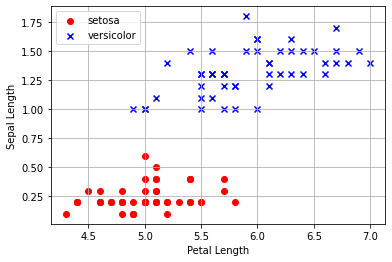

In [2]:
# Pembacaan data dan visualisasi
df = pd.read_csv('Dataset/iris.csv', header=None)

# Mengambil data dari kolom ke-4
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Membuat diagram scatter untuk mendeskripsikan setosa dan versicolor dengan warna yang berbeda
a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Membuat grafik untuk koordinat X dan Y
# Koordinat X dinamakan dengan Petal Length
# Koordinat Y dinamakan dengan Sepal Length
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')

# Membuat grid pada grafik
plt.grid()

# Menampilkan grafik
plt.show()

In [4]:
# Pembuatan kelas Perceptron

# Membuat class dengan nama perceptron dengan parameter object
class Perceptron(object):
    # Kontruktor class dalam python dinamakan def init
    # Class yang berparameter
    # Self = objek atau atribut
    # Eta = alfa (learning rate) dengan interval 0-1 yang dimana dalam studi kasus ini dg nilai 0,01
    # Iter = iterasi yang diberi nilai 10
    def __init__(self, eta=0.01, n_iter=10):

        # self.eta = Atribut class perceptron
        # = eta : ngambil dari data yang dikirimkan melalui instansiasi objek class perceptron
        self.eta = eta
        self.n_iter = n_iter
    

    # Membuat fungsi berparameter
    # def fit = fungsi untuk mengolah data dengan logika perceptron
    # X dan y adalah data yang akan diolah
    # X = variabel yang tidak tergantung apapun
    # y = variabel data yang akan diprediksi
    def fit(self, X, y):
        
        # self.w merupakan atribut dari perceptron yang dimana merepresentasikan bobot awal dari setiap data X
        # np.zeros(1 + X.shape[1]) artinya membuat array baru dengan ukuran dimensinya sama dengan X yg nilainya di set 0
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        # Melakukan looping sebanyak n_iter
        for _ in range(self.n_iter):
            errors = 0

            # Melakukan looping sebanyak X
            for xi, target in zip(X, y):
                # Mengupdate bobot
                # Jika target asli belum sesuai dg prediksi maka bobotnya diupdate
                # Jika sudah sesuai, bobotnya tetap
                # Prediksi ini untuk melihat prediksi
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # Membuat fungsi untuk mengupdate atribut w (bobot)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Membuat fungsi untuk mengembalikan nilai 1 jika net input X menghasilkan nilai lebih besar daripada 0, selain itu mengembalikan nilai 1
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

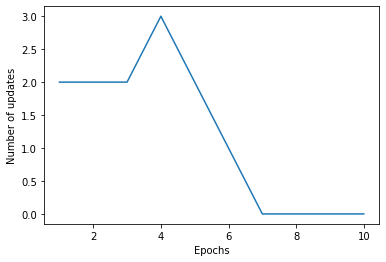

In [5]:
# penerapan perceptron

# Mengambil data sebanyak 100 baris dari kolom index 0-4 atau kolom ke-5
y = df.iloc[0:100, 4].values
# Mengubah data yang bernama iris setosa menjadi -1, selain itu menjadi 1
y = np.where(y == 'Iris-setosa', -1, 1)
# Mengambil data sebanyak 100 baris dari kolom index 0-3 atau kolom ke-4
X = df.iloc[0:100, [0, 3]].values

# Membuat suatu objek dari class perceptron dengan parameter eta dan iter
# Data 0.1 dan 10 kesimpen dari fungsi def init
ppn = Perceptron(eta=0.1, n_iter=10)
# Memanggil data perceptron yang dimasukkan ke logika dengan menggunakan fungsi fit
ppn.fit(X, y)

# plot kesalahan untuk setiap iterasi untuk memeriksa konvergensi
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
# Membuat label untuk koordinat X dg nama epoch yang menggambarkan iterasi
plt.xlabel('Epochs')
# Membuat label untuk koordinat Y dg nama number of updates yang menggambarkan error
plt.ylabel('Number of updates')
# Menampilkan grafik
plt.show()

In [6]:
# buat fungsi untuk plot decision region

# Mengimport warna
from matplotlib.colors import ListedColormap

# Membuat fungsi untuk mengkonfigurasi tampilan plot decision region
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Mengatur generator penanda dan peta warna
    # Menginisialisasi tanda yang akan digunakan pada plotnya
    markers = ('s', 'x', 'o', '^', 'v')
    # Menginisialisasi warna yang akan digunakan pada plotnya
    colors = ('r', 'b', 'g', 'k', 'grey')
    # Membuat template tampilan dari warna
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Membuat koordinat xx1 menjadi X, xx2 menjadi Y
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # Gunakan metode prediksi untuk memprediksi label kelas z dari titik kisi
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Menggambar grafik menggunakan matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Menampilkan Y ke dalam plot
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


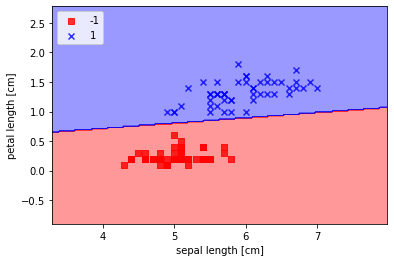

In [8]:
# Hasil plot 
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Kegiatan 2 - Perceptron II

Pada kegiatan ini, praktik yang dilakukan adalah untuk menyelesaikan kasus klasifikasi dokumen. Perceptron yang diimplementasikan berasal dari library Scikit-Learn.

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report, confusion_matrix


In [8]:
# persiapan kategori data yang diklasifikasi

categories = ['rec.sport.hockey','rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories,remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',categories=categories,remove=('headers','footers','quotes'))

In [9]:
# penerapan klasifikasi dokumen

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
clf = Perceptron(random_state=11)
clf.fit(X_train,newsgroups_train.target)
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### Kegiatan 3 - Neural Network

In [11]:
# data yang dibaca adalah data wine,
# data ini belum memiliki nama variabel setiap kolom sehingga nama variabel baru ini dibuat melalui names

wine = pd.read_csv('Dataset/wine.csv',names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# deskripsi data dengan bentuk tampilan dibalik dari umumnya
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [13]:
# output: ditemukan 178 data dengan 13 fitur dan 1 kolom label

wine.shape

(178, 14)

In [14]:
# penentuan variabel X dan y
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [15]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Data Preprocessing

Penerapan neural network (terutama di Python) mengalami kesulitan dalam mengolah data ketika data tersebut belum dinormalisasi. Multilayer perceptron sensitif terhadap feature scaling sehingga perlu dilakukan penskalaan data terlebih dahulu. Contoh standarisasi ini dapat dilakukan menggunakan StandardScaler.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
# fitting pada data training

scaler.fit(X_train)

StandardScaler()

In [18]:
# standarisasi
StandardScaler(copy=True, with_mean=True, with_std=True)

# transformasi data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training Model

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# pada parameter hidden_layer_sizes, tentukan jumlah neuron yang diperlukan pada setiap layer.
# Pada contoh ini hanya digunakan 3 buah layer dengan jumlah iterasi maksimal sebanyak 500 kali

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


# fitting data tarining terhadap mlp
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

#### Prediksi dan Evaluasi

In [21]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0 16  1]
 [ 0  1  9]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.94      0.94      0.94        17
           3       0.90      0.90      0.90        10

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [23]:
# ekstraksi bobot dan bias MLP setelah training model
# coefs_ adalah matriks bobot, matriks bobot pada indeks i menandakan bobot di antara layer i dan layer i+1

len(mlp.coefs_)

4

In [24]:
len(mlp.coefs_[0])

13

In [25]:
# intercepts_ adalah vektor bias, vektor pada indeks i menandakan nilai bias yang ditambahkan pada layer i+1
len(mlp.intercepts_[0])

13